In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from selenium import webdriver
import json
import string
import matplotlib.pyplot as plt

driver = webdriver.Chrome('/Users/joel/selenium_drivers/chromedriver 3')

In [2]:
driver.get('https://en.wikipedia.org/wiki/List_of_current_United_States_senators')

In [4]:
table = driver.find_element_by_id('senators')

In [6]:
columns = table.find_element_by_tag_name('thead')

In [9]:
column_names = [_.text for _ in columns.find_elements_by_tag_name('th')]
    

In [13]:
body = table.find_element_by_tag_name('tbody')

In [14]:
rows = body.find_elements_by_tag_name('tr')

In [43]:
data = {}
state = None
for row in rows:
    cells = row.find_elements_by_tag_name('td')
    if len(cells) == 9:
        cells = [state] + cells
    name = row.find_element_by_tag_name('th').text
    
    senator = {}
    
    for idx in range(len(column_names)):
        if column_names[idx] == 'State':
            if cells[idx].text in data:
                continue
            else:
                data[cells[idx].text] = []
                state = cells[idx]
        elif column_names[idx] == 'Senator':
            senator['Senator'] = name
            continue
        elif column_names[idx] == 'Image':
            link = cells[idx].find_element_by_tag_name('a')
            senator['Image'] = link.get_attribute('href')
        else:
            senator[column_names[idx]] = cells[idx].text
    data[state.text].append(senator)

In [46]:
data

{'Alabama': [{'Image': 'https://en.wikipedia.org/wiki/File:Richard_Shelby,_official_portrait,_112th_Congress_(cropped).jpg',
   'Senator': 'Richard Shelby',
   'Party': 'Republican',
   'Born': 'May 6, 1934 (age 85)',
   'Occupation(s)': 'Lawyer',
   'Previous\noffice(s)': 'U.S. House\nAlabama Senate',
   'Assumed office': 'January 3, 1987',
   'Term up': '2022',
   'Residence': 'Tuscaloosa[1]'},
  {'Image': 'https://en.wikipedia.org/wiki/File:Senator_Doug_Jones_official_photo_(cropped_2).jpg',
   'Senator': 'Doug Jones[d]',
   'Party': 'Democratic',
   'Born': 'May 4, 1954 (age 65)',
   'Occupation(s)': 'Lawyer',
   'Previous\noffice(s)': 'Staff counsel, U.S. Senate Judiciary Committee\nU.S. Attorney for the Northern District of Alabama',
   'Assumed office': 'January 3, 2018',
   'Term up': '2020',
   'Residence': 'Birmingham[1]'}],
 'Alaska': [{'Image': 'https://en.wikipedia.org/wiki/File:Lisa_Murkowski_official_photo_(cropped).jpg',
   'Senator': 'Lisa Murkowski',
   'Party': 'Repu

In [49]:
states = list(data.keys())

In [52]:
Senators = []
for state in states:
    list_of_senators = data[state]
    for sen in list_of_senators:
        copy = sen
        copy['state'] = state
        Senators.append(copy)
    

In [55]:
df = pd.DataFrame(Senators)

In [57]:
df = df.set_index('Senator')

In [58]:
df

,Assumed office,Born,Image,Occupation(s),Party,Previous office(s),Residence,Term up,state
Senator,,,,,,,,,
Richard Shelby,"January 3, 1987","May 6, 1934 (age 85)",https://en.wikipedia.org/wiki/File:Richard_She...,Lawyer,Republican,U.S. House\nAlabama Senate,Tuscaloosa[1],2022,Alabama
Doug Jones[d],"January 3, 2018","May 4, 1954 (age 65)",https://en.wikipedia.org/wiki/File:Senator_Dou...,Lawyer,Democratic,"Staff counsel, U.S. Senate Judiciary Committee...",Birmingham[1],2020,Alabama
Lisa Murkowski,"December 20, 2002","May 22, 1957 (age 62)",https://en.wikipedia.org/wiki/File:Lisa_Murkow...,Lawyer,Republican,Alaska House of Representatives,Anchorage[3],2022,Alaska
Dan Sullivan,"January 3, 2015","November 13, 1964 (age 55)",https://en.wikipedia.org/wiki/File:Senator_Dan...,U.S. Marine Corps officer\nLawyer,Republican,Alaska Attorney General\nAssistant Secretary o...,Anchorage[3],2020,Alaska
Kyrsten Sinema,"January 3, 2019","July 12, 1976 (age 43)",https://en.wikipedia.org/wiki/File:Kyrsten_Sin...,Social Worker\nPolitical Activist,Democratic,U.S. House\nArizona Senate\nArizona House of R...,Phoenix[4],2024,Arizona
Martha McSally[e],"January 3, 2019","March 22, 1966 (age 53)",https://en.wikipedia.org/wiki/File:Sen._Martha...,"U.S. Air Force officer\nProfessor, George C. M...",Republican,U.S. House,Tucson[7],2020 (Special)\n2022 (General),Arizona
John Boozman,"January 3, 2011","December 10, 1950 (age 69)",https://en.wikipedia.org/wiki/File:John_Boozma...,Optometrist,Republican,U.S. House\nRogers Public Schools Board,Rogers[8],2022,Arkansas
Tom Cotton,"January 3, 2015","May 13, 1977 (age 42)",https://en.wikipedia.org/wiki/File:Tom_Cotton_...,Lawyer\nUnited States Army officer,Republican,U.S. House,Dardanelle[8],2020,Arkansas
Dianne Feinstein,"November 10, 1992","June 22, 1933 (age 86)",https://en.wikipedia.org/wiki/File:Dianne_Fein...,Non-profit organization fellow,Democratic,Mayor of San Francisco\nSan Francisco Board of...,San Francisco[9],2024,California


In [60]:
import re

In [73]:
re.findall('\([^\d]*(\d+)[^\d]*\)',df.Born[0])[0]

'85'

In [75]:
def extract_age(text):
    age = re.findall('\([^\d]*(\d+)[^\d]*\)',text)
    age = int(age[0])
    
    return age

In [77]:
df['age'] = df.Born.apply(extract_age)

In [79]:
df.age.mean()

63.45

In [80]:
df.age.median()

64.0

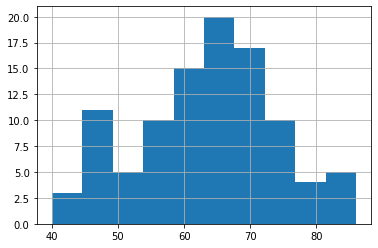

In [82]:
df.age.hist();

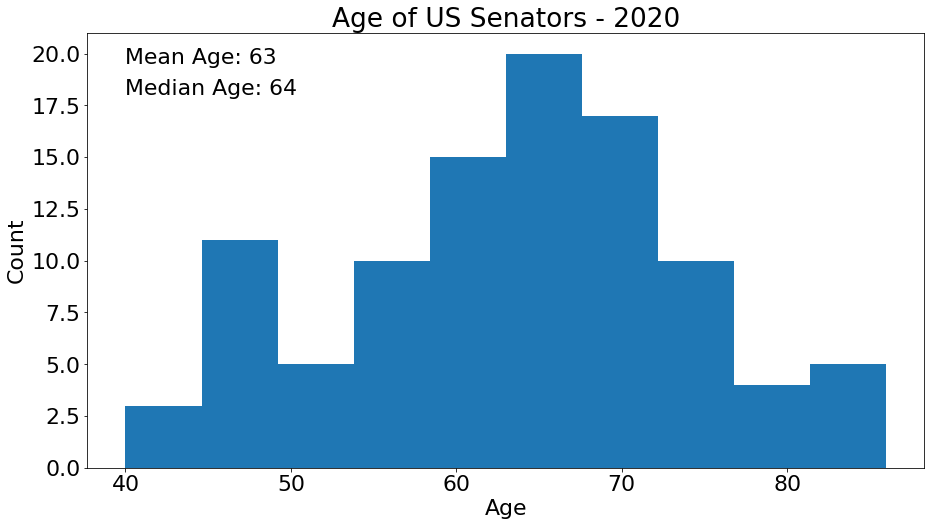

In [129]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
print()
print()
plt.figure(figsize=(15,8))
plt.hist(df.age)
plt.annotate('Mean Age: {}'.format(round(df.age.mean())), (40,19.5))
plt.annotate('Median Age: {}'.format(round(df.age.median())), (40,18))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age of US Senators - 2020');

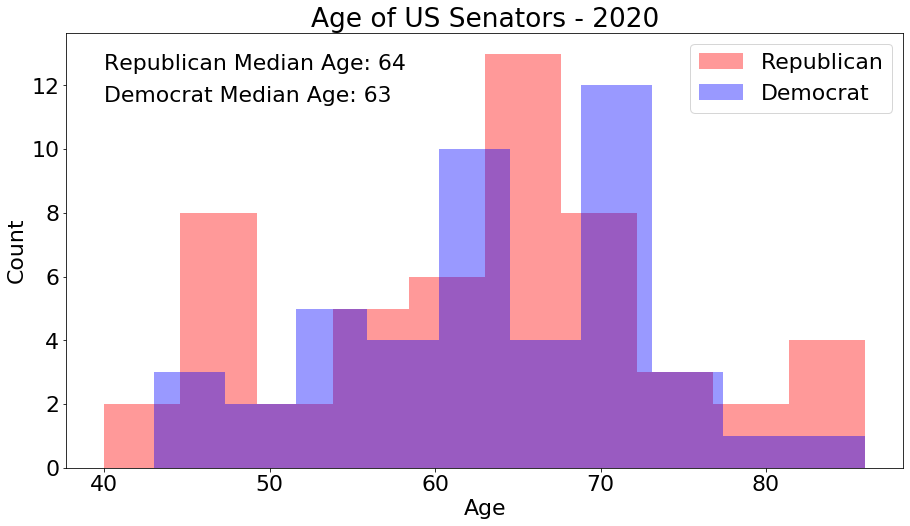

In [134]:
rep_median_age = round(df[df.Party == 'Republican'].age.median())
dem_median_age = round(df[df.Party == 'Democratic'].age.median())
plt.figure(figsize=(15,8))
plt.hist(df[df.Party == 'Republican'].age, color= 'red', alpha = .4, label = 'Republican')
plt.hist(df[df.Party == 'Democratic'].age, color = 'blue', alpha = .4, label = 'Democrat')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.annotate('Republican Median Age: {}'.format(rep_median_age), (40, 12.5))
plt.annotate('Democrat Median Age: {}'.format(dem_median_age), (40, 11.5))
plt.title('Age of US Senators - 2020');


(array([ 3.,  2.,  5.,  4., 10.,  4., 12.,  3.,  1.,  1.]),
 array([43. , 47.3, 51.6, 55.9, 60.2, 64.5, 68.8, 73.1, 77.4, 81.7, 86. ]),
 <a list of 10 Patch objects>)

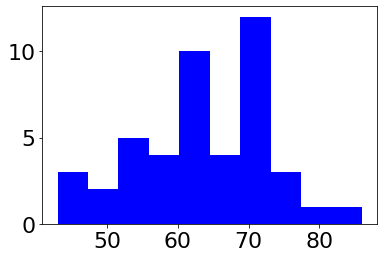

In [106]:
plt.hist(df[df.Party == 'Democratic'].age, color = 'blue')

,Assumed office,Born,Image,Occupation(s),Party,Previous office(s),Residence,Term up,state,age
Senator,,,,,,,,,,


In [105]:
df

,Assumed office,Born,Image,Occupation(s),Party,Previous office(s),Residence,Term up,state,age
Senator,,,,,,,,,,
Richard Shelby,"January 3, 1987","May 6, 1934 (age 85)",https://en.wikipedia.org/wiki/File:Richard_She...,Lawyer,Republican,U.S. House\nAlabama Senate,Tuscaloosa[1],2022,Alabama,85
Doug Jones[d],"January 3, 2018","May 4, 1954 (age 65)",https://en.wikipedia.org/wiki/File:Senator_Dou...,Lawyer,Democratic,"Staff counsel, U.S. Senate Judiciary Committee...",Birmingham[1],2020,Alabama,65
Lisa Murkowski,"December 20, 2002","May 22, 1957 (age 62)",https://en.wikipedia.org/wiki/File:Lisa_Murkow...,Lawyer,Republican,Alaska House of Representatives,Anchorage[3],2022,Alaska,62
Dan Sullivan,"January 3, 2015","November 13, 1964 (age 55)",https://en.wikipedia.org/wiki/File:Senator_Dan...,U.S. Marine Corps officer\nLawyer,Republican,Alaska Attorney General\nAssistant Secretary o...,Anchorage[3],2020,Alaska,55
Kyrsten Sinema,"January 3, 2019","July 12, 1976 (age 43)",https://en.wikipedia.org/wiki/File:Kyrsten_Sin...,Social Worker\nPolitical Activist,Democratic,U.S. House\nArizona Senate\nArizona House of R...,Phoenix[4],2024,Arizona,43
Martha McSally[e],"January 3, 2019","March 22, 1966 (age 53)",https://en.wikipedia.org/wiki/File:Sen._Martha...,"U.S. Air Force officer\nProfessor, George C. M...",Republican,U.S. House,Tucson[7],2020 (Special)\n2022 (General),Arizona,53
John Boozman,"January 3, 2011","December 10, 1950 (age 69)",https://en.wikipedia.org/wiki/File:John_Boozma...,Optometrist,Republican,U.S. House\nRogers Public Schools Board,Rogers[8],2022,Arkansas,69
Tom Cotton,"January 3, 2015","May 13, 1977 (age 42)",https://en.wikipedia.org/wiki/File:Tom_Cotton_...,Lawyer\nUnited States Army officer,Republican,U.S. House,Dardanelle[8],2020,Arkansas,42
Dianne Feinstein,"November 10, 1992","June 22, 1933 (age 86)",https://en.wikipedia.org/wiki/File:Dianne_Fein...,Non-profit organization fellow,Democratic,Mayor of San Francisco\nSan Francisco Board of...,San Francisco[9],2024,California,86


In [137]:
with open('us_senators_2020.json', mode='w', encoding='utf-8') as f:
    json.dump(Senators, f)

In [146]:
count = 0
problems = []
for idx in df.index:
    try:
        pd.to_datetime(df['Assumed office'][idx])
    except:
        count += 1
        problems.append(idx)
        
print('Count:', count)

df.loc[problems]

Count: 2


,Assumed office,Born,Image,Occupation(s),Party,Previous office(s),Residence,Term up,state,age
Senator,,,,,,,,,,
Tina Smith,"January 3, 2018[f]","March 4, 1958 (age 62)","https://en.wikipedia.org/wiki/File:Tina_Smith,...",Public relations consultant\nNonprofit organiz...,Democratic,Lieutenant Governor of Minnesota,Minneapolis[28],2020,Minnesota,62
Cindy Hyde-Smith,"April 9, 2018[g]","May 10, 1959 (age 60)",https://en.wikipedia.org/wiki/File:Cindy_Hyde-...,Farmer,Republican,Mississippi Commissioner of Agriculture and Co...,Brookhaven,2020,Mississippi,60


In [149]:
test = df.loc[problems[0]]['Assumed office']

In [151]:
test.replace('[f]', '').replace('[g]', '')

'January 3, 2018'

In [153]:
df['Assumed office'] = df['Assumed office'].apply(lambda x: x.replace('[f]', '').replace('[g]', ''))

In [156]:
df['Assumed office'] = pd.to_datetime(df['Assumed office'])

In [160]:
count = 0
problems = []
for idx in df.index:
    try:
        pd.to_datetime(df.Born[idx][:-9])
    except:
        count += 1
        problems.append(idx)
        
print('Count:', count)

Count: 0


In [162]:
df.Born = df.Born.apply(lambda x: x[:-9])

In [165]:
df.Born = pd.to_datetime(df.Born)

In [166]:
df

,Assumed office,Born,Image,Occupation(s),Party,Previous office(s),Residence,Term up,state,age
Senator,,,,,,,,,,
Richard Shelby,1987-01-03,1934-05-06,https://en.wikipedia.org/wiki/File:Richard_She...,Lawyer,Republican,U.S. House\nAlabama Senate,Tuscaloosa[1],2022,Alabama,85
Doug Jones[d],2018-01-03,1954-05-04,https://en.wikipedia.org/wiki/File:Senator_Dou...,Lawyer,Democratic,"Staff counsel, U.S. Senate Judiciary Committee...",Birmingham[1],2020,Alabama,65
Lisa Murkowski,2002-12-20,1957-05-22,https://en.wikipedia.org/wiki/File:Lisa_Murkow...,Lawyer,Republican,Alaska House of Representatives,Anchorage[3],2022,Alaska,62
Dan Sullivan,2015-01-03,1964-11-13,https://en.wikipedia.org/wiki/File:Senator_Dan...,U.S. Marine Corps officer\nLawyer,Republican,Alaska Attorney General\nAssistant Secretary o...,Anchorage[3],2020,Alaska,55
Kyrsten Sinema,2019-01-03,1976-07-12,https://en.wikipedia.org/wiki/File:Kyrsten_Sin...,Social Worker\nPolitical Activist,Democratic,U.S. House\nArizona Senate\nArizona House of R...,Phoenix[4],2024,Arizona,43
Martha McSally[e],2019-01-03,1966-03-22,https://en.wikipedia.org/wiki/File:Sen._Martha...,"U.S. Air Force officer\nProfessor, George C. M...",Republican,U.S. House,Tucson[7],2020 (Special)\n2022 (General),Arizona,53
John Boozman,2011-01-03,1950-12-10,https://en.wikipedia.org/wiki/File:John_Boozma...,Optometrist,Republican,U.S. House\nRogers Public Schools Board,Rogers[8],2022,Arkansas,69
Tom Cotton,2015-01-03,1977-05-13,https://en.wikipedia.org/wiki/File:Tom_Cotton_...,Lawyer\nUnited States Army officer,Republican,U.S. House,Dardanelle[8],2020,Arkansas,42
Dianne Feinstein,1992-11-10,1933-06-22,https://en.wikipedia.org/wiki/File:Dianne_Fein...,Non-profit organization fellow,Democratic,Mayor of San Francisco\nSan Francisco Board of...,San Francisco[9],2024,California,86


In [169]:
df = df.rename({'Assumed office': 'assumed'}, axis = 1)

In [173]:
df.columns = [x.lower().replace(' ', '_').replace('\n', '_').replace('(s)', '') for x in df.columns]

In [184]:
x = df.assumed[0] - df.born[0]

In [186]:
x.days/365

52.6986301369863

In [192]:
assumed_office_ages = []
for idx in df.index:
    timestamp = df.assumed[idx] - df.born[idx]
    days = timestamp.days
    assumed_office_ages.append(int(days/365))

In [194]:
df['assumed_office_age'] = assumed_office_ages

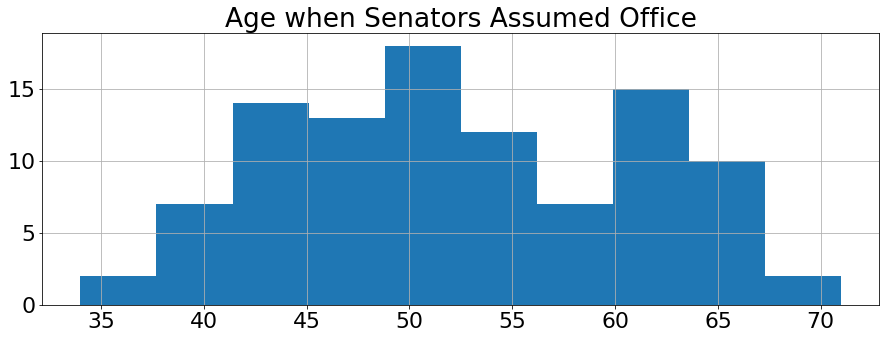

In [201]:
print()
df.assumed_office_age.hist(figsize = (15,5))
plt.title('Age when Senators Assumed Office');

In [203]:
df.term_up.value_counts()

2024                              33
2020                              33
2022                              32
2020 (Special)\n2022 (General)     2
Name: term_up, dtype: int64

In [206]:
rep = df[df.party == 'Republican']
dem = df[df.party == 'Democratic']

In [207]:
rep.term_up.value_counts()

2020                              21
2022                              20
2024                              10
2020 (Special)\n2022 (General)     2
Name: term_up, dtype: int64

In [208]:
dem.term_up.value_counts()

2024    21
2022    12
2020    12
Name: term_up, dtype: int64